## K-Means Clustering

### An Unsupervised Learning Algorithm

<center><img src="k-means-graph.gif" width="350" /></center>

### Unspervised Learning
Unsupervised learning is a type of machine learning where the algorithm learns from unlabeled data, meaning that the data does not have explicit target labels or outputs associated with it. In unsupervised learning, the goal is to explore the inherent patterns, relationships, and structures within the data without the guidance of labeled examples.

## Explanation

K-Means aims to minimize the sum of squared distances between data points and their assigned centroids within a cluster. It's an iterative process that refines the clusters in each iteration to create more compact and cohesive groups of data points.

- Watch: [Computerphile - K-Means Algorithm](https://www.youtube.com/watch?v=yR7k19YBqiw)


### Step by Step

1. Choose 'k' (number of clusters) as 3.

2. Randomly initialize three centroids.

3. Assign each data point to the closest centroid.

4. Calculate the new centroids based on the assigned data points.

5. Repeat the assignment and centroid update steps for a few iterations until convergence.

6. Once the algorithm converges, you'll have three clusters with customer data points grouped together.

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as am
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
# Graph setup
%matplotlib inline
rcParams['figure.figsize'] = 7,4

In [3]:
# We will use the scikit built-in dataset 'Iris' - https://en.wikipedia.org/wiki/Iris_flower_data_set
iris = datasets.load_iris()

X = scale(iris.data)

y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[0:10,]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

## Build and run the model

In [4]:
# to suppress memory leak warning:
import os
os.environ['OMP_NUM_THREADS'] = '1'


In [5]:
# Cluster the data
clustering = KMeans(n_clusters=3, random_state=5, n_init=10) # sets the number of centroids and randomizes centroid positions
clustering.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=5)

## Plotting the model outputs

In [6]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ["sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]
y.columns = ["Targets"]

Text(0.5, 1.0, 'K-Means Classification')

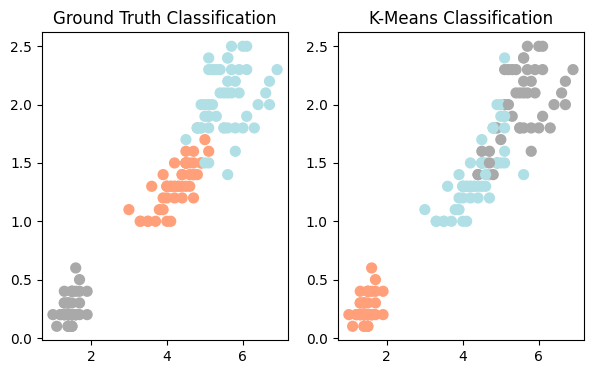

In [7]:
color_theme = np.array(["darkgray", "lightsalmon", "powderblue"])

plt.subplot(1,2,1)

# Petal_Length along the x-axis and Petal_Width along the y-axis
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title("Ground Truth Classification")

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title("K-Means Classification")

Text(0.5, 1.0, 'K-Means Classification')

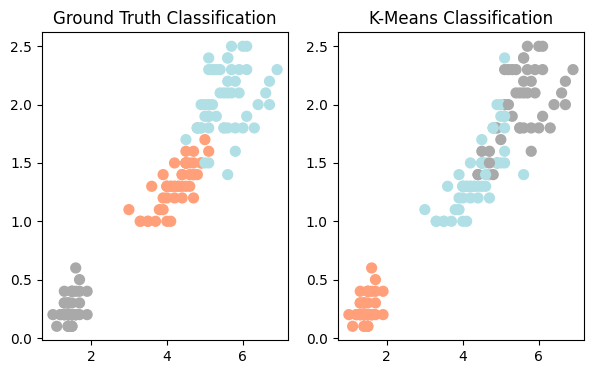

In [8]:
relabel = np.choose(clustering.labels_, [2,0,1]).astype(np.int64)

plt.subplot(1,2,1)

# Petal_Length along the x-axis and Petal_Width along the y-axis
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title("Ground Truth Classification")

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title("K-Means Classification")

## Evaluate the Clustering Results

In [9]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



## Interpreting the Results

<img src="K_means_results.png" />

### References

- [K-Means Clustering - Methods using Scikit-learn in Python - Tutorial 23 in Jupyter Notebook](https://www.youtube.com/watch?v=ikt0sny_ImY&t=603s) 
